In [95]:
import matplotlib
matplotlib.use('Agg')
!pip install numba

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

    100% |████████████████████████████████| 3.2MB 7.5MB/s 
    100% |████████████████████████████████| 16.1MB 2.9MB/s 


In [0]:
#utils

import numpy as np


def policy_index_proba(A, s, d, det_pol=None, islist=None, value_base=False):
    """
    Args:
        A (int, list): if int it represents the number of actions per state,
                       if list it contains the available actions per state
        s (int): the code of the state
        d (list, list of list): the policy: S x 1 (det) or S x As (stoch)
        det_pol (none, bool): true if the policy is deterministic, false otherwise
        islist (none, bool): true if the action set is a list, false otherwise
        value_based (boolean): used to identify if the policy (det)
                               stores values or indeces
    Returns:
        A_idxs: the indexes of the actions selected by the policy
        proba: the probabilities associated to the selected actions
    """
    if det_pol is None:
        det_pol = False if isinstance(d[0], list) else True
    if islist is None:
        islist = isinstance(A, list)

    if det_pol:
        proba = 1
        if islist and value_base:
            A_idxs = A[s].index(d[s])
        else:
            A_idxs = d[s]

    else:
        proba = d[s]
        if islist:
            A_idxs = range(len(A[s]))
        else:
            A_idxs = range(A)
    return A_idxs, proba


def v_from_q(S, A, d, q):
    islist = isinstance(A, list)
    det_pol = False if isinstance(d[0], list) else True

    v = np.empty((S,))
    for s in range(S):
        A_idxs, proba = policy_index_proba(A=A, s=s, d=d, det_pol=det_pol, islist=islist)
        v[s] = np.dot(proba, q[s, A_idxs])

    return v


### gridrender.py

In [0]:
from tkinter import *
import numpy as np


class GUI(Canvas):
    def __init__(self, master, *args, **kwargs):
        Canvas.__init__(self, master=master, *args, **kwargs)


def draw_square_q(polygon, x, y, q, actions, dim=50):
    polygon.create_polygon([x, y, x + dim, y, x + dim, y + dim, x, y + dim], outline='black',
                           fill='white', width=2)

    font = ('Helvetica', '30', 'bold')

    for i, a in enumerate(actions):
        if a == 0:
            polygon.create_polygon([x + dim, y, x + dim / 2., y + dim / 2., x + dim, y + dim], outline='gray',
                                   fill='red', width=2)
            polygon.create_text(x + 3 * dim / 4., y + dim / 2., font=font, text="{:.3f}".format(q[i]), anchor='center')
        elif a == 1:
            polygon.create_polygon([x, y + dim, x + dim / 2., y + dim / 2., x + dim, y + dim], outline='gray',
                                   fill='green', width=2)
            polygon.create_text(x + dim / 2., y + 3 * dim / 4., font=font, text="{:.3f}".format(q[i]), anchor='n')
        elif a == 2:
            polygon.create_polygon([x, y, x + dim / 2., y + dim / 2., x, y + dim], outline='gray',
                                   fill='yellow', width=2)
            polygon.create_text(x + dim / 4., y + dim / 2., font=font, text="{:.3f}".format(q[i]), anchor='center')
        elif a == 3:
            polygon.create_polygon([x + dim, y, x + dim / 2., y + dim / 2., x, y], outline='gray',
                                   fill='purple', width=2)
            polygon.create_text(x + dim / 2., y + dim / 4., font=font, text="{:.3f}".format(q[i]), anchor='s')


def draw_square_policy(w, x, y, pol, actions, dim=50):
    w.create_polygon([x, y, x + dim, y, x + dim, y + dim, x, y + dim], outline='black',
                     fill='white', width=2)

    font = ('Helvetica', '30', 'bold')
    if (hasattr(pol, "size") and pol.size > 1) or isinstance(pol, list):
        d = pol
    else:
        d = [-1] * len(actions)
        idx = actions.index(pol)
        d[idx] = 1

    for j, v in enumerate(d):
        if j < len(actions):
            a = actions[j]
            if a == 0 and v > 0:
                w.create_line(x + dim / 2., y + dim / 2., x + 3*dim / 4., y + dim / 2., tags=("line",), arrow="last")
                if not np.isclose(v, 1.):
                    w.create_text(x + 3*dim / 4., y + dim / 2., font=font, text="{:.1f}".format(v), anchor='w')
            elif a == 1 and v > 0:
                w.create_line(x + dim / 2., y + dim / 2., x + dim / 2., y + 3* dim / 4., tags=("line",), arrow="last")
                if not np.isclose(v, 1.):
                    w.create_text(x + dim / 2., y + 3*dim / 4., font=font, text="{:.1f}".format(v), anchor='n')
            elif a == 2 and v >0:
                w.create_line(x + dim / 2., y + dim / 2., x+dim/4., y + dim/2., tags=("line",), arrow="last")
                if not np.isclose(v, 1.):
                    w.create_text(x + dim / 4., y + dim / 2., font=font, text="{:.1f}".format(v), anchor='e')
            elif a == 3 and v >0:
                w.create_line(x + dim / 2., y + dim / 2., x + dim / 2., y + dim / 4., tags=("line",), arrow="last")
                if not np.isclose(v, 1.):
                    w.create_text(x + dim / 2., y + dim / 4., font=font, text="{:.1f}".format(v), anchor='s')


def render_q(env, q):
    root = Tk()
    w = GUI(root)
    rows, cols = len(env.grid), max(map(len, env.grid))
    dim = 200
    w.config(width=cols * (dim + 12), height=rows * (dim + 12))
    for s in range(env.n_states):
        r, c = env.state2coord[s]
        draw_square_q(w, 10 + c * (dim + 4), 10 + r * (dim + 4), dim=dim, q=q[s],
                      actions=env.state_actions[s])
        w.pack()
    w.pack()
    root.mainloop()


def render_policy(env, d):
    root = Tk()
    w = GUI(root)
    rows, cols = len(env.grid), max(map(len, env.grid))
    dim = 200
    w.config(width=cols * (dim + 12), height=rows * (dim + 12))
    for s in range(env.n_states):
        r, c = env.state2coord[s]
        draw_square_policy(w, 10 + c * (dim + 4), 10 + r * (dim + 4), dim=dim, pol=d[s],
                           actions=env.state_actions[s])
        w.pack()
    w.pack()
    root.mainloop()


gridworld.py

In [0]:
import numpy as np
import numbers
#import gridrender as gui
from tkinter import Tk
import tkinter.font as tkFont
import copy



class GridWorld:
    def __init__(self, gamma=0.95, grid=None, render=False):
        self.grid = grid

        self.action_names = np.array(['right', 'down', 'left', 'up'])

        self.n_rows, self.n_cols = len(self.grid), max(map(len, self.grid))

        # Create a map to translate coordinates [r,c] to scalar index
        # (i.e., state) and vice-versa
        self.coord2state = np.empty_like(self.grid, dtype=np.int)
        self.n_states = 0
        self.state2coord = []
        for i in range(self.n_rows):
            for j in range(len(self.grid[i])):
                if self.grid[i][j] != 'x':
                    self.coord2state[i, j] = self.n_states
                    self.n_states += 1
                    self.state2coord.append([i, j])
                else:
                    self.coord2state[i, j] = -1

        # compute the actions available in each state
        self.compute_available_actions()
        self.gamma = gamma
        self.proba_succ = 0.9
        self.render = render

    def reset(self):
        """
        Returns:
            An initial state randomly drawn from
            the initial distribution
        """
        n_states = self.n_states
        u = 0.9
        a = np.zeros((n_states,))
        a[0] =0.5
        a[3] = -0.8
        u = np.power(np.ones((n_states,)) + a, u)
        p = np.exp(u) / np.sum(np.exp(u))
        x_0 = np.random.choice(np.arange(n_states), p=p)
        return x_0

    def step(self, state, action):
        """
        Args:
            state (int): the amount of good
            action (int): the action to be executed

        Returns:
            next_state (int): the state reached by performing the action
            reward (float): a scalar value representing the immediate reward
            absorb (boolean): True if the next_state is absorsing, False otherwise
        """
        r, c = self.state2coord[state]
        assert action in self.state_actions[state]
        if isinstance(self.grid[r][c], numbers.Number):
            return state, 0, True
        else:
            failed = np.random.rand(1) > self.proba_succ
            if action == 0:
                c = min(self.n_cols - 1, c + 1) if not failed else max(0, c - 1)
            elif action == 1:
                r = min(self.n_rows - 1, r + 1) if not failed else max(0, r - 1)
            elif action == 2:
                c = max(0, c - 1) if not failed else min(self.n_cols - 1, c + 1)
            elif action == 3:
                r = max(0, r - 1) if not failed else min(self.n_rows - 1, r + 1)

            if self.grid[r][c] == 'x':
                next_state = state
                r, c = self.state2coord[next_state]
            else:
                next_state = self.coord2state[r, c]
            if isinstance(self.grid[r][c], numbers.Number):
                reward = self.grid[r][c]
                absorb = True
            else:
                reward = 0.
                absorb = False

        if self.render:
            self.show(state, action, next_state, reward)

        return next_state, reward, absorb

    def show(self, state, action, next_state, reward):
        dim = 200
        rows, cols = len(self.grid) + 0.5, max(map(len, self.grid))
        if not hasattr(self, 'window'):
            root = Tk()
            self.window = GUI(root)

            self.window.config(width=cols * (dim + 12), height=rows * (dim + 12))
            my_font = tkFont.Font(family="Arial", size=32, weight="bold")
            for s in range(self.n_states):
                r, c = self.state2coord[s]
                x, y = 10 + c * (dim + 4), 10 + r * (dim + 4)
                if isinstance(self.grid[r][c], numbers.Number):
                    self.window.create_polygon([x, y, x + dim, y, x + dim, y + dim, x, y + dim], outline='black',
                                               fill='blue', width=2)
                    self.window.create_text(x + dim / 2., y + dim / 2., text="{:.1f}".format(self.grid[r][c]),
                                            font=my_font, fill='white')
                else:
                    self.window.create_polygon([x, y, x + dim, y, x + dim, y + dim, x, y + dim], outline='black',
                                               fill='white', width=2)
            self.window.pack()

        my_font = tkFont.Font(family="Arial", size=32, weight="bold")

        r0, c0 = self.state2coord[state]
        r0, c0 = 10 + c0 * (dim + 4), 10 + r0 * (dim + 4)
        x0, y0 = r0 + dim / 2., c0 + dim / 2.
        r1, c1 = self.state2coord[next_state]
        r1, c1 = 10 + c1 * (dim + 4), 10 + r1 * (dim + 4)
        x1, y1 = r1 + dim / 2., c1 + dim / 2.

        if hasattr(self, 'oval2'):
            # self.window.delete(self.line1)
            # self.window.delete(self.oval1)
            self.window.delete(self.oval2)
            self.window.delete(self.text1)
            self.window.delete(self.text2)

        # self.line1 = self.window.create_arc(x0, y0, x1, y1, dash=(3,5))
        # self.oval1 = self.window.create_oval(x0 - dim / 20., y0 - dim / 20., x0 + dim / 20., y0 + dim / 20., dash=(3,5))
        self.oval2 = self.window.create_oval(x1 - dim / 5., y1 - dim / 5., x1 + dim / 5., y1 + dim / 5., fill='red')
        self.text1 = self.window.create_text(dim, (rows - 0.25) * (dim + 12), font=my_font,
                                             text="r= {:.1f}".format(reward), anchor='center')
        self.text2 = self.window.create_text(2 * dim, (rows - 0.25) * (dim + 12), font=my_font,
                                             text="action: {}".format(self.action_names[action]), anchor='center')
        self.window.update()

    def compute_available_actions(self):
        # define available actions in each state
        # actions are indexed by: 0=right, 1=down, 2=left, 3=up
        self.state_actions = []
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                if isinstance(self.grid[i][j], numbers.Number):
                    self.state_actions.append([0])
                elif self.grid[i][j] != 'x':
                    actions = [0, 1, 2, 3]
                    if i == 0:
                        actions.remove(3)
                    if j == self.n_cols - 1:
                        actions.remove(0)
                    if i == self.n_rows - 1:
                        actions.remove(1)
                    if j == 0:
                        actions.remove(2)

                    for a in copy.copy(actions):
                        r, c = i, j
                        if a == 0:
                            c = min(self.n_cols - 1, c + 1)
                        elif a == 1:
                            r = min(self.n_rows - 1, r + 1)
                        elif a == 2:
                            c = max(0, c - 1)
                        else:
                            r = max(0, r - 1)
                        if self.grid[r][c] == 'x':
                            actions.remove(a)

                    self.state_actions.append(actions)


grid1 = [
    ['', '', '', 1],
    ['', 'x', '', -1],
    ['', '', '', '']
]
GridWorld1 = GridWorld(gamma=0.95, grid=grid1)


## 1 Dynamic Programming

### Q1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline


#I first create 1 2d-matrix for each given state
s0 = np.array([
    [0.55,0.45,0.], #probabilities of landing respectively in s1, s2, s3 given a0 and s0
    [0.3,0.7,0.], #probabilities of landing respectively in s1, s2, s3 given a1 and s0
    [1.,0.,0.] ]) #probabilities of landing respectively in s1, s2, s3 given a2 and s0
s1 = np.array([ #same as above, given s1
    [1,0,0], 
    [0,0.4,0.6],
    [0,1,0]])
s2 = np.array([ #same as above, given s2
    [0,1,0],
    [0,0.6,0.4],
    [0,0,1]])

#I then create 2 dictionaries :
P = {'s0':s0, 's1':s1, 's2':s2} #P[si][j,k] Probability of landing in sk given si,aj 
R = {'s0': [0,0,0.05], 's1': [0,0,0], 's2': [0,1,0.9]}


#Finally, for readibility purposes, I create 2 lists for both the set of actions
#and the set of states, one with integers and one with strings
global Action, States, Action_string, States_string
Action = [0,1,2]
States = [0,1,2]
Action_string = ['a0','a1','a2']
States_string = ['s0','s1','s2']
discount = 0.95


Here, it is clear that the optimal policy is $\pi* = $ always choose a1 except in state s2 where you should choose a2

### Q2

In [0]:
def T(V): #Returns the Bellman operator TV
  TV = np.zeros(len(V))
  for s in States:
    state = States_string[s]
    TV[s] = np.max([R[state][a] + discount*np.sum([V[next_s]*P[state][a,next_s] 
                                                     for next_s in States]) 
                      for a in Action])
  return TV

def return_argmax(V): #Returns the set of actions that maximises the given V
  Argmax = []
  for s in States:
    state = States_string[s]
    action = np.argmax([R[state][a] + discount*np.sum([V[next_s]*P[state][a,next_s] 
                                                     for next_s in States]) 
                      for a in Action])
    Argmax += [Action_string[action]]
  return Argmax
     
def VI(V,epsilon): #The value iteration algorithm, which also returns a histogram of ||Vk - V*||
  
  All_Vs = [] #stores the values of all the Vs
  V_old = V + 2*epsilon #initialise V_old so that the initial error is bigger than epsilon 
  while np.linalg.norm(V_old - V,np.inf) > epsilon:
    
    V_old = V
    V = T(V)
    All_Vs.append(V)
    
  hist = [np.linalg.norm(v - V,np.inf) for v in All_Vs] #create histogram of ||Vk - V*|| 
                                                        #by approximating V* by the last V computed
  return return_argmax(V), hist

The policy returned is ['a1', 'a1', 'a2']


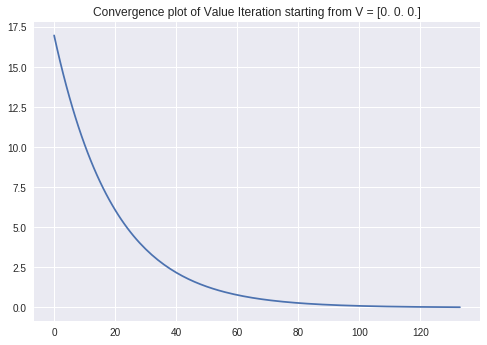

In [240]:
#Testing VI

V_init = np.array([0.,0.,0.])  
pi, hist = VI(V_init,0.001)
print('The policy returned is '+ str(pi))
plt.plot(hist)
plt.title("Convergence plot of Value Iteration starting from V = " + str(V_init))
plt.show()

In [0]:
def PE(pi): #Returns the policy evaluation of pi
  
  V = np.zeros(3)
  for s in States:
    
    state = States_string[s]
    V[s] = np.max([R[state][a] + discount*np.sum([V[next_s]*P[state][a,next_s] 
                    for next_s in States]) for a in pi])
  return V

def PI(pi,epsilon): #The Policy Improvement algorithm
  
  All_Vs = []
  pi_old = pi + 2*epsilon #initialise pi_old so that the initial error is bigger than epsilon 
  while np.linalg.norm(pi_old - pi,np.inf) > epsilon:
    
    pi_old = pi
    V = PE(pi)            #policy evaluation              
    pi = return_argmax(V) #policy improvement
    All_Vs.append(V)
    
  hist = [np.linalg.norm(v - V,np.inf) for v in All_Vs]

  return pi, hist

The policy returned is ['a1', 'a1', 'a2']


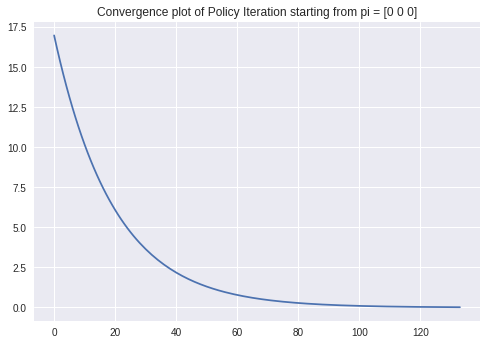

In [242]:
#Testing PI

pi_init = np.array([0,0,0])  
pi, hist1 = VI(pi_init,0.001)
print('The policy returned is '+ str(pi))
plt.plot(hist1)
plt.title("Convergence plot of Policy Iteration starting from pi = " + str(pi_init))
plt.show()

Let's compare both :

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


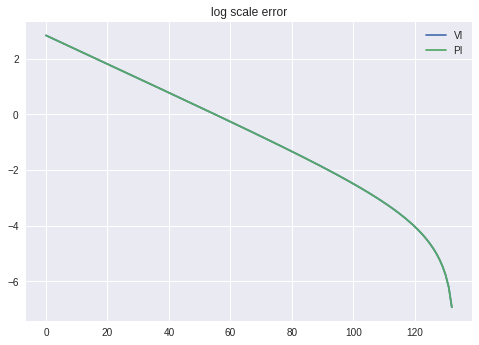

In [244]:
plt.plot(np.log(hist), label = "VI")
plt.plot(np.log(hist1), label = "PI")
plt.legend()
plt.title("log scale error")
plt.show()

I must have made an error as I find that convergence is exactly the same in both cases

## A review of RL Agent/Environnment Interaction

## Q4

### Policy evaluation

#### Creating the function V_n

In [0]:
from numba import njit, prange

#@njit( parallel=True )
def V_n(N,Tmax,S,pi):
  gamma = 0.95
  #compute r stochasticaly:
  V = 0
  for k in range(N):
    s = S
    t = 0; absorb = False
    while (t < Tmax) and not absorb:
      t +=1
      s,r,absorb = GridWorld1.step(s,pi[s])
      V += (gamma**(t-1))*r
  return V/float(N)

#### Testing the function

Reached N = 950 ...


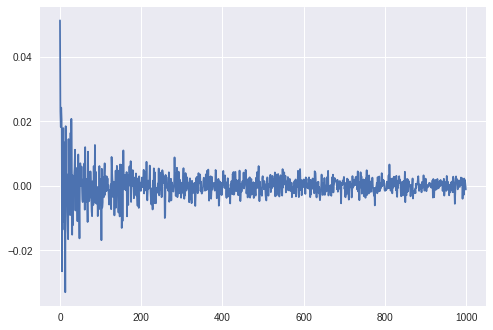

In [102]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

N = 1000; Tmax = 20

pi = [0,0,0,0,3,0,0,0,0,0,3]
v_q4 = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514])

#estimate mu_0
mu_0 = np.zeros(11)
for reset in range(N*10):
  mu_0[GridWorld1.reset()] += 1./N

#Compute J_N iteratively
J_N = np.zeros(N)
for n in range(1,N):
  if (n-1)%50 == 0: #print every 50 iterations just so we're not too bored waiting
    clear_output()
    print('Reached N = {} ...\r'.format(str(n - 1)))
  J_N[n] = sum([mu_0[s]*V_n(n,Tmax,s,pi) for s in range(11)])


J_pi = sum([mu_0[s]*v_q4[s] for s in range(11)])
plt.plot(J_N - J_pi)
#plt.plot(np.abs(J_N - J_pi))
plt.title('J_N - J_pi as a function of N')
plt.show()

Sadly, I'm using Google colab (to which I am quite new), and I wasn't able to visualise the Q functions

### The Q-learning algorithm

In [0]:
import random

def Q_learning(N,Tmax,epsilon,grid,*increment,keep_track = False):
  #in order to speed up computation, I'm using an increment so that I don't have
  #to compute all values for ||v* - v_pi_n||
  gamma = 0.95
  Q = np.zeros((11,4)) #keeps track of Q values
  pi = np.zeros(11)
  if keep_track: 
    increment = increment[0]
    R = np.zeros(N) #keeps track of cumulated reward if keep_track is True
    V = np.zeros(int(N/increment)) #keeps track of ||v* - v_pi_n|| every increment if keep_track is True
  
  for i in range(N):
    #initialise iterative values
    t = 1; absorb = False
    s = grid.reset()
    st = s #st = s_t, s = s_{t+1}
    
    while (t < Tmax) and not absorb:
      #choose action
      actions = grid.state_actions[st]
      if np.random.uniform()<epsilon:  
        at = random.choice(actions)   #choose randomly in possible actions 
      else:
        at = actions[np.argmax(Q[st,actions])]  #choose best action 
      #evaluate result
      s,r,absorb = grid.step(st,at)
      #update Q function
      alpha = 1./t
      delta = r + gamma*np.max(Q[s,:]) - Q[st,at]
      Q[st,at] += alpha*delta
      Q[st,at]=(1 - alpha)*Q[st,at] + alpha*(r + gamma*np.max(Q[s,:]))
      #update iterative values
      st = s
      t +=1
      
    #update R and V if keep_track is True
    if keep_track:
      R[i]+=r
      if i%(increment)==0:
        #update pi
        for s_tilde in range(11):
          action = GridWorld1.state_actions[s_tilde]
          pi[s_tilde] = action[np.argmax(Q[s_tilde,action])]
        #compute V = ||v* - v_pi_n||
        v_pi_n = [V_n(1000,Tmax,s_tilde,pi) for s_tilde in range(11)]  #compute v_pi_n using previous function
        V[int(i/increment)] = np.linalg.norm(v_pi_n - v_opt,np.inf)
        #print so we know what's going on
        clear_output()
        print('Iteration ' + str(i))
        
  if keep_track:
    return pi,np.cumsum(R),V
  else:
    pi = [GridWorld1.state_actions[s][np.argmax(Q[s,GridWorld1.state_actions[s] ])] for s in range(11)]
    return pi

### Q5

The choice of epsilon is crucial as it provides the balance between exploration and exploitation. Let's look at the performance metrics for different values of epsilon:

Iteration 9900


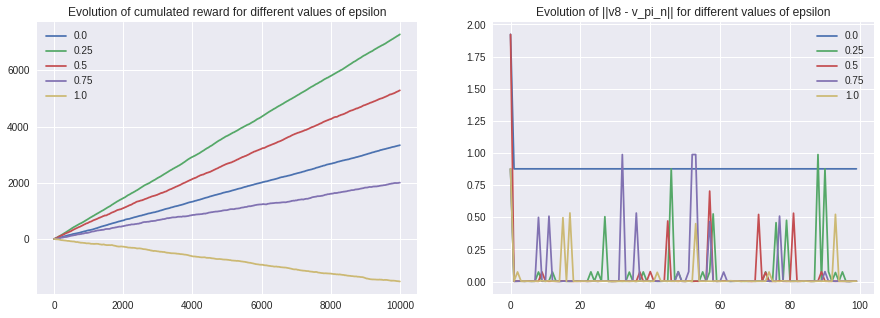

In [216]:
N = 10000
subdiv = 100
Tmax = 20
n_subdiv = 5
epsilon = np.linspace(0,1,n_subdiv)

plt.figure(figsize=(15,5))

for i in range(n_subdiv):
  clear_output()
  print('epsilon = '+str(epsilon[i]))
  pi,R,V = Q_learning(N,Tmax,epsilon[i],GridWorld1,subdiv,keep_track = True)
  
  plt.subplot(121)
  plt.plot(R,label = str(epsilon[i]))
  
  plt.subplot(122)
  plt.plot(V,label = str(epsilon[i]))
  
plt.subplot(121)
plt.title('Evolution of cumulated reward for different values of epsilon')
plt.legend()
plt.subplot(122)
plt.title('Evolution of ||v8 - v_pi_n|| for different values of epsilon')
plt.legend()
 

As we can see, extreme values of epsilon are not a good idea, as they encourage either too much or too little exploration.
For the extreme case epsilon = 1, the algorithm always explores randomly, which slows convergence.
For the case where epsilon = 0, there is simply no exploration).

Iteration 9900


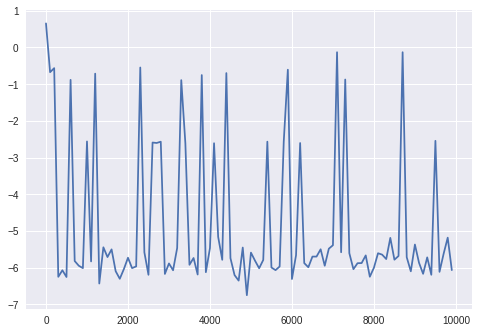

In [247]:
N = 10000
subdiv = 100
Tmax = 30

v_opt = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001])

#print(Q_learning(N,Tmax,0.9,GridWorld1))

pi,R,V = Q_learning(N,Tmax,0.3,GridWorld1,subdiv,keep_track = True)
plt.plot(np.array(range(int(N/subdiv)))*subdiv,np.log(V))
plt.show()


## Q6

No, the change of the distribution doesn't affect the optimal MDP